# 모두카페 데이터 분석 (정용은)

## 0. 라이브러리 로딩

In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontpath = './NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'./NanumBarunGothic.ttf'

## 1. 데이터 확인

In [2]:
# 데이터 로딩
entry_data = pd.read_csv('./entry_data.csv')
sales_data = pd.read_csv('./sales_data.csv')
item_data = pd.read_csv('./item_data.csv')
item_entry_data = pd.read_csv('./item_entry_data.csv')

* <b>입장 기록 데이터 (entry_data )</b>

In [3]:
print(entry_data.info())
entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


* <b>음식/음료 판매 데이터 (sales_data)</b>

In [4]:
print(sales_data.info())
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


* <b>음식/음료 종류와 가격 데이터 (item_data)</b>

In [5]:
print(item_data.info())
item_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
None


,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


* <b>입장권 종류와 가격 데이터 (item_entry_data)</b>

In [6]:
print(item_entry_data.info())
item_entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 2. 데이터 분석

### 필수 문제1 : 월별 매출액 추세 (sales_data를 이용합니다.)
* <b>월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.</b>

In [7]:
# 중요하지 않은 속성을 제거한 판매 데이터를 temp_var 에 입력
temp_var = sales_data[['결제일시','상품명','판매수량','결제금액','고객']]

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]

# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["결제금액"] = temp_var["결제금액"].apply(lambda i: i.replace(",", ""))

/tmp/ipykernel_61/409273356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_var['date'] = temp_var['결제일시'].str[:7]
/tmp/ipykernel_61/409273356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_var["결제금액"] = temp_var["결제금액"].apply(lambda i: i.replace(",", ""))


> 위 코드에서 발생하는 경고 메시지는 "SettingWithCopyWarning"이며, 이는 Pandas 데이터프레임에 대한 조작이 원래 데이터프레임의 사본에 적용되고 있을 때 발생하는 일반적인 경고다. 
> 이 경고는 데이터프레임 조작 시 원본 데이터프레임이 변경될 수 있으며 이로 인해 예기치 않은 결과가 발생할 수 있다는 것을 사용자에게 경고하는 것이다.

* 경고 해결방법
>  경고를 해결하기 위해서는 temp_var를 생성할 때 .copy()함수를 사용해서 데이터를 생성한다.
> ```
temp_var = sales_data[['결제일시','상품명','판매수량','결제금액','고객']].copy()
> ```
* 참고 : https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning

In [8]:
# 중요하지 않은 속성을 제거한 판매 데이터를 temp_var 에 입력
temp_var = sales_data[['결제일시','상품명','판매수량','결제금액','고객']].copy()

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]

# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["결제금액"] = temp_var["결제금액"].apply(lambda i: i.replace(",", ""))
temp_var

,결제일시,상품명,판매수량,결제금액,고객,date
0,2022-04-01 19:41,치킨카라아케 6pc,1,4500,customer275507,2022-04
1,2022-04-01 19:41,짜장라면(계란추가),1,5500,customer275507,2022-04
2,2022-04-01 19:41,라면,1,4000,customer275507,2022-04
3,2022-04-01 19:41,비엔나소세지(토핑),1,1000,customer275507,2022-04
4,2022-04-01 19:41,라면(계란/치즈추가),1,5000,customer275507,2022-04
...,...,...,...,...,...,...
7100,2021-02-17 14:21,아메리카노(HOT),-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,카페모카(HOT),1,4500,NaN,2021-02
7102,2021-02-17 13:51,카페모카(HOT),-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카페라떼(HOT),1,4000,NaN,2021-02


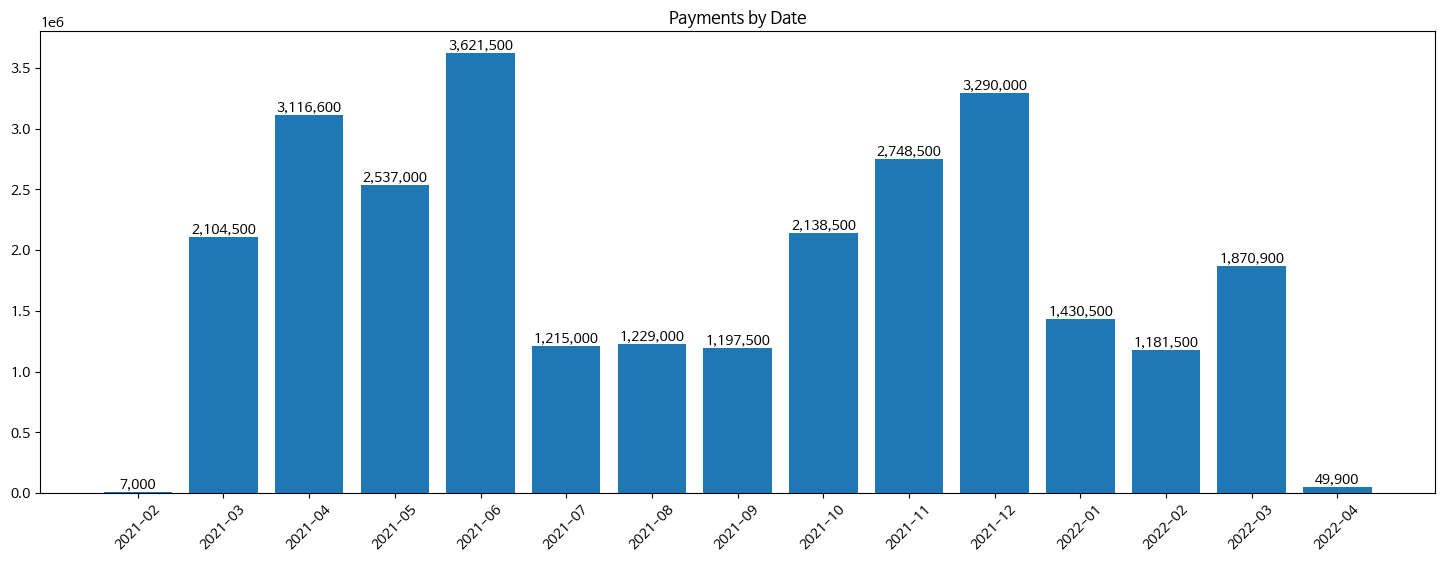

In [9]:
# temp_var 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype(int)

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()

# 집계 결과를 시각화하기
plt.figure(figsize=(18,6))
ax = plt.bar(payment_data.index, payment_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='edge')
plt.title('Payments by Date')
plt.xticks(rotation=45)
plt.show()

* <b>비정상 데이터 확인 및 제거</b>
> 2021-02와 2022-04의 매출액이 비정상적으로 적은 이유를 확인하고, 비정상 데이터가 원인이라면 이를 제거한다.

In [10]:
temp_var[(temp_var['date']=='2021-02') | (temp_var['date']=='2022-04')]

,결제일시,상품명,판매수량,결제금액,고객,date
0,2022-04-01 19:41,치킨카라아케 6pc,1,4500,customer275507,2022-04
1,2022-04-01 19:41,짜장라면(계란추가),1,5500,customer275507,2022-04
2,2022-04-01 19:41,라면,1,4000,customer275507,2022-04
3,2022-04-01 19:41,비엔나소세지(토핑),1,1000,customer275507,2022-04
4,2022-04-01 19:41,라면(계란/치즈추가),1,5000,customer275507,2022-04
5,2022-04-01 16:32,라면,1,4000,customer977070,2022-04
6,2022-04-01 16:32,소떡소떡,1,3000,customer977070,2022-04
7,2022-04-01 15:19,아이스티,1,3900,customer630809,2022-04
8,2022-04-01 13:01,순살닭다리덮밥,1,8000,customer255068,2022-04
9,2022-04-01 13:01,만두라면,1,5000,customer255068,2022-04


> * 2021-02 의 매출은 고객정보가 NaN인 비정상 데이터가 많다.
> * 2022-04 의 매출은 4월1일(하루)의 매출정보만 있으므로, 월별 매출로 활용하기 어려운 데이터라고 판단된다.  
  
<b>따라서, 2021-02, 2022-04 데이터는 활용하지 않는다.

In [11]:
temp_var = temp_var[(temp_var['date']!='2021-02') & (temp_var['date']!='2022-04')]

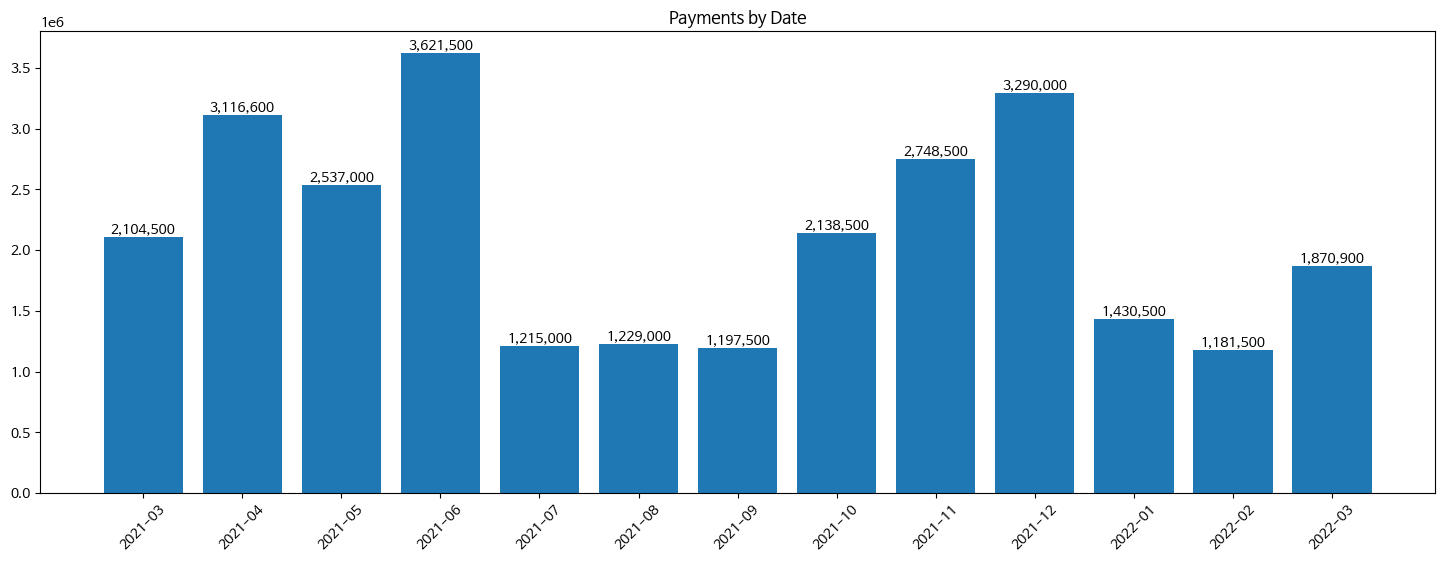

In [12]:
# 비정상 데이터를 제거한 결과를 시각화하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()

# 집계 결과를 시각화하기
plt.figure(figsize=(18,6))
ax = plt.bar(payment_data.index, payment_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='edge')
plt.title('Payments by Date')
plt.xticks(rotation=45)
plt.show()

<b>월별 매출액 데이터 분석</b>
> * 매출 많은 달 : 4월, 5월, 6월, 10월, 11월, 12월
> * 매출 평균에 근접한 달 : 3월
> * 매출 적은 달 : 7월, 8월, 9월, 1월, 2월  
  
분석 결과, 학기중에는 매출이 많고, 방학기간에는 상대적으로 매출이 적다

### 필수 문제2: 가장 인기 있는 음식/음료 (sales_data를 이용합니다.)

* <b>여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.</b>

In [13]:
# temp_var의 상품명을 value_counts를 이용해 집계하기(판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계)
vc = temp_var[temp_var['판매수량']!=-1]['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame({'판매수량': vc}).nlargest(10, '판매수량')
items_count

,판매수량
김치볶음밥,1204
라면,747
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


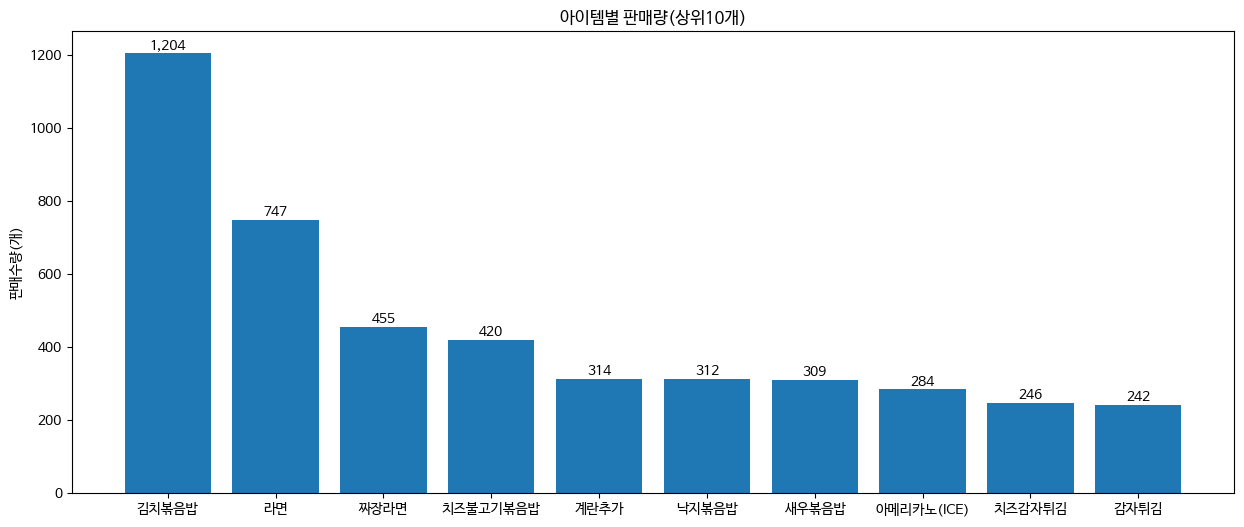

In [14]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,6))
ax = plt.bar(items_count.index, items_count['판매수량'])
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='edge')
plt.ylabel('판매수량(개)')
plt.title('아이템별 판매량(상위10개)')
plt.show()

In [41]:
# 월별 상품 매출 현황
monthly_aggregated = temp_var.groupby(['date','상품명']).agg('결제금액').sum()
monthly_aggregated = pd.DataFrame(monthly_aggregated)

결제금액
date    상품명               
2021-03 감자튀김         58500
        계란추가         17000
        김치볶음밥       485000
        낙지볶음밥       162500
        녹차라떼(HOT)     4500
...                    ...
2022-03 크로플          60500
        페퍼민트(ICE)     4400
        플레인요거트스무디    17700
        한돈간장불고기덮밥    22500
        한돈고추장불고기덮밥   37500

[670 rows x 1 columns]

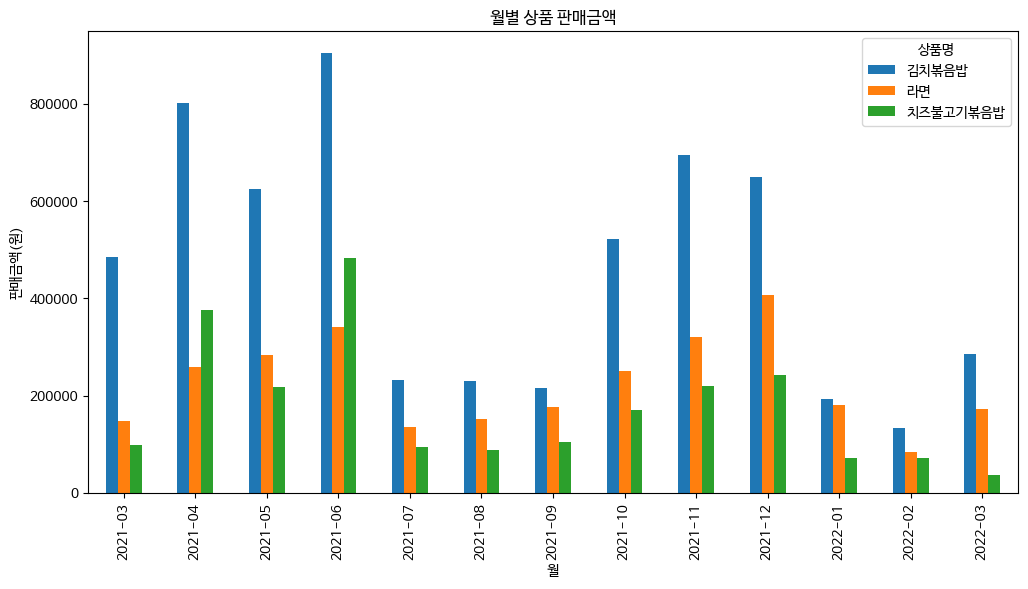

In [49]:
pivot_table = monthly_aggregated.pivot_table(index='date', columns='상품명', values='결제금액', aggfunc='sum')

top_3_products = pivot_table.sum().sort_values(ascending=False).head(3).index
filtered_pivot = pivot_table[top_3_products]

filtered_pivot.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('월별 상품 판매금액')
plt.xlabel('월')
plt.ylabel('판매금액(원)')

# 그래프 출력
plt.show() 